# Principal Component Analysis

## PCA

In [1]:
import pandas as pd
import dataframe_image as dfi
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# https://www.kaggle.com/datasets/saurabh00007/iriscsv
filename = 'Iris.csv'
df = pd.read_csv(filename, index_col=0)
cols_x = list(df.columns[0:4])
col_y = df.columns[4]

# model pipeline for PCA
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('PCA', PCA()),
])
features = df[cols_x]
pipe.fit(features)

# PCA scores
scores = pipe.transform(features)
df_pca = pd.DataFrame(
    scores,
    columns=["PC{}".format(x + 1) for x in range(scores.shape[1])],
    index=df.index
)
cols_pc = list(df_pca.columns)
df_pca.insert(0, col_y, df[col_y].copy())

## Scatter for PCs

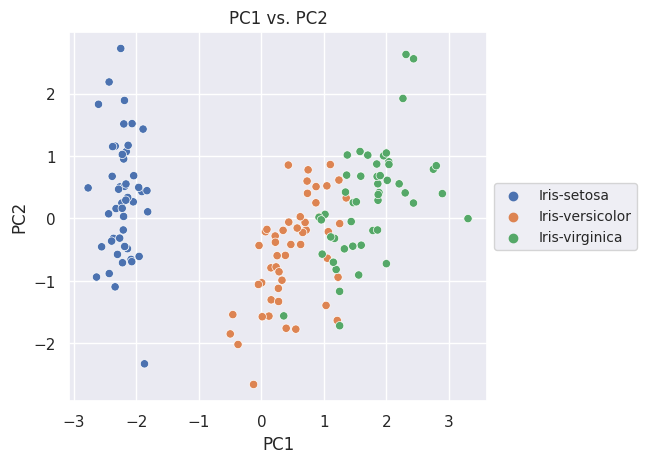

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.size'] = 14
sns.set()

fig, ax = plt.subplots()
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=col_y, ax=ax)
ax.set_aspect('equal')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
ax.set_title('PC1 vs. PC2')

plt.savefig('iris_021_PCA_PC1PC2.png')
plt.show()

# KDE plot

## by target

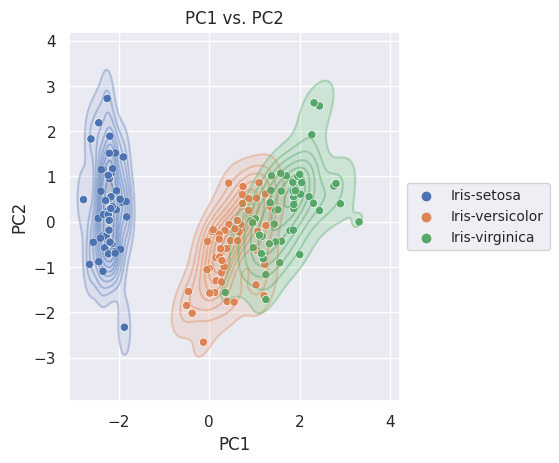

In [3]:
fig, ax = plt.subplots()
sns.kdeplot(data=df_pca, x='PC1', y='PC2', hue=col_y, fill=True, alpha=0.3, ax=ax)
sns.kdeplot(data=df_pca, x='PC1', y='PC2', hue=col_y, alpha=0.3, ax=ax)
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=col_y, ax=ax)
ax.set_aspect('equal')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
ax.set_title('PC1 vs. PC2')

plt.savefig('iris_022_PCA_PC1PC2.png')
plt.show()

## All

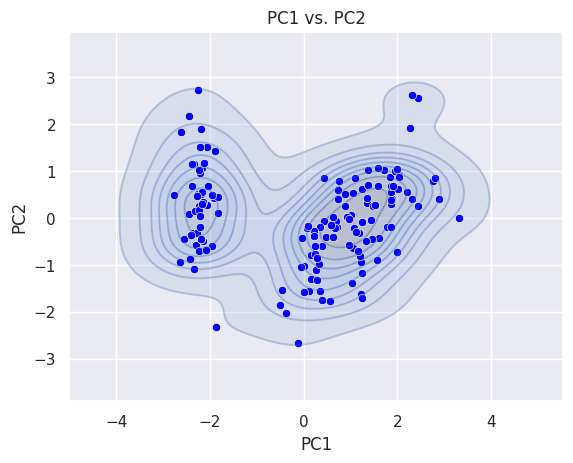

In [4]:
fig, ax = plt.subplots()
sns.kdeplot(data=df_pca, x='PC1', y='PC2', fill=True, alpha=0.3, ax=ax)
sns.kdeplot(data=df_pca, x='PC1', y='PC2', alpha=0.3, ax=ax)
sns.scatterplot(data=df_pca, x='PC1', y='PC2', color='blue', ax=ax)
ax.set_aspect('equal')
ax.set_title('PC1 vs. PC2')

plt.savefig('iris_023_PCA_PC1PC2.png')
plt.show()

# Joint plot

## by target

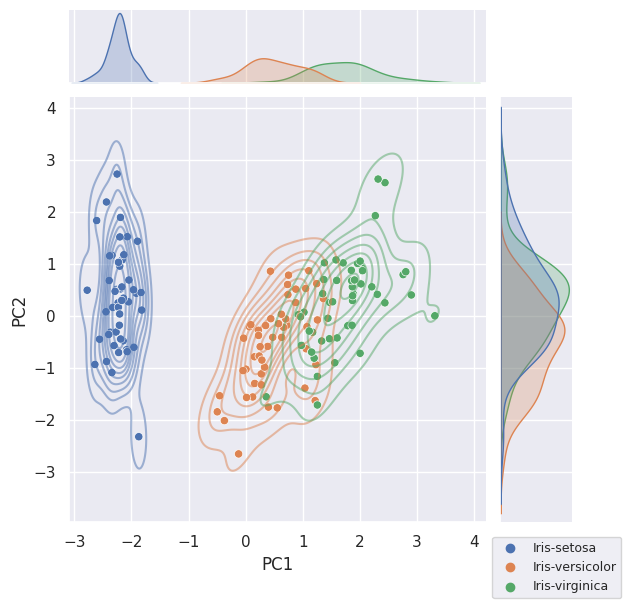

In [5]:
g = sns.jointplot(data=df_pca, x='PC1', y='PC2', hue=col_y)
g.plot_joint(sns.kdeplot, alpha=0.5)

plt.legend(bbox_to_anchor=(1, -0.02), loc='upper left', fontsize=9)
plt.savefig('iris_024_PCA_PC1PC2.png')
plt.show()

## All

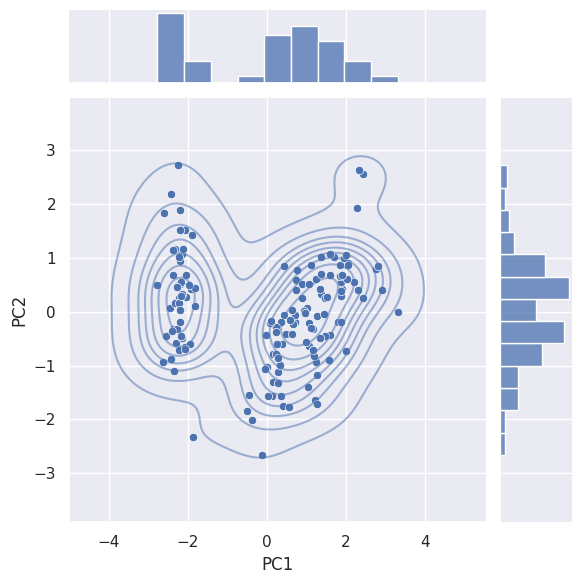

In [6]:
g = sns.jointplot(data=df_pca, x='PC1', y='PC2')
g.plot_joint(sns.kdeplot, alpha=0.5)

plt.savefig('iris_025_PCA_PC1PC2.png')
plt.show()

# Mahalanobis Distance

In [7]:
# https://scikit-learn.org/stable/auto_examples/covariance/plot_mahalanobis_distances.html
from sklearn.covariance import EmpiricalCovariance, MinCovDet
X = df_pca[['PC1', 'PC2']]
emp_cov = EmpiricalCovariance().fit(X)
robust_cov = MinCovDet().fit(X)

## function for range adjust

In [8]:
def adjust_range(list_range, mag):
    xdelta =(list_range[1] - list_range[0]) * factor
    return list_range[0] - xdelta, list_range[1] + xdelta

## EmpiricalCovariance

/home/bitwalk/PycharmProjects/MyNotebook/venv/lib64/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but EmpiricalCovariance was fitted with feature names
  warnings.warn(


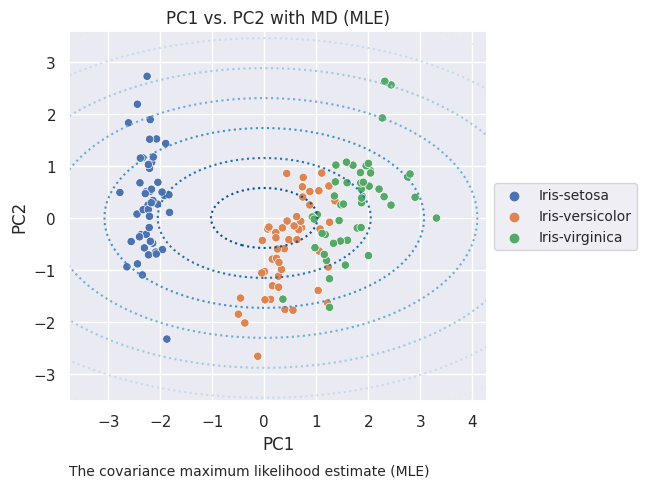

In [9]:
import numpy as np

fig, ax = plt.subplots()
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=col_y, ax=ax)
ax.set_aspect('equal')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
ax.set_title('PC1 vs. PC2 with MD (MLE)')

# adjust axis range wider
factor = 0.1
plt.xlim(adjust_range(plt.xlim(), factor))
plt.ylim(adjust_range(plt.ylim(), factor))

# Create meshgrid of feature 1 and feature 2 values
xx, yy = np.meshgrid(
    np.linspace(plt.xlim()[0], plt.xlim()[1], 100),
    np.linspace(plt.ylim()[0], plt.ylim()[1], 100),
)
zz = np.c_[xx.ravel(), yy.ravel()]

# Calculate the MLE based Mahalanobis distances of the meshgrid
mahal_emp_cov = emp_cov.mahalanobis(zz)
mahal_emp_cov = mahal_emp_cov.reshape(xx.shape)
emp_cov_contour = plt.contour(
    xx, yy, np.sqrt(mahal_emp_cov), cmap=plt.cm.Blues_r, linestyles="dotted"
)
ax.annotate('The covariance maximum likelihood estimate (MLE)', xy = (0, -0.2), xycoords='axes fraction', fontsize=10)

plt.savefig('iris_026_PCA_PC1PC2.png')
plt.show()

## MinCovDet

/home/bitwalk/PycharmProjects/MyNotebook/venv/lib64/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MinCovDet was fitted with feature names
  warnings.warn(


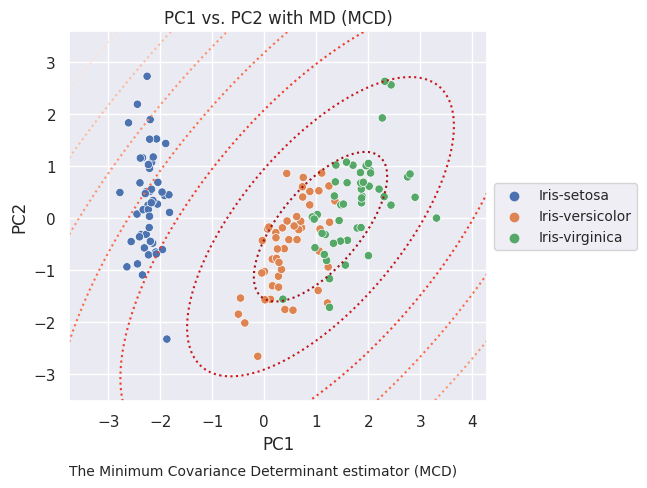

In [10]:
fig, ax = plt.subplots()
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=col_y, ax=ax)
ax.set_aspect('equal', adjustable='box')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
ax.set_title('PC1 vs. PC2 with MD (MCD)')

# adjust axis range wider
factor = 0.1
plt.xlim(adjust_range(plt.xlim(), factor))
plt.ylim(adjust_range(plt.ylim(), factor))

# Create meshgrid of feature 1 and feature 2 values
xx, yy = np.meshgrid(
    np.linspace(plt.xlim()[0], plt.xlim()[1], 100),
    np.linspace(plt.ylim()[0], plt.ylim()[1], 100),
)
zz = np.c_[xx.ravel(), yy.ravel()]

# Calculate the MCD based Mahalanobis distances
mahal_robust_cov = robust_cov.mahalanobis(zz)
mahal_robust_cov = mahal_robust_cov.reshape(xx.shape)
robust_contour = ax.contour(
    xx, yy, np.sqrt(mahal_robust_cov), cmap=plt.cm.Reds_r, linestyles="dotted"
)
ax.annotate('The Minimum Covariance Determinant estimator (MCD)', xy = (0, -0.2), xycoords='axes fraction', fontsize=10)

plt.savefig('iris_027_PCA_PC1PC2.png')
plt.show()